# Intensity Dependent Refractive Index Model (All In One)

This file runs the Extended Drude Model, then runs the Two-Temperature Model automatically.

Just input laser parameters, make any changes to material constants if need be, then hit run.

The model can take some time to run, don't be impatient.

## Model Settings

In [1]:
import IDRIM.aio as AIO
from numpy import inf
from IDRIM.constants import *
import matplotlib.pyplot as plt
import IDRIM.sample as sam

In [2]:
textsize = 18
font = {'family': 'DejaVu Sans', 'weight': 'normal','size': textsize,}
plt.rc('font', family='DejaVu Sans', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=textsize)
plt.rc('ytick', labelsize=textsize)
plt.rc('axes', labelsize=textsize)
plt.rc('lines', linewidth=2)
width = 10
height = width / 1.618
plt.rcParams["figure.figsize"] = (width, height)

### Laser Settings

In [3]:
Parameters = {
    'wavelength': 1204e-9,#Wavelength of laser
    'pulse': 100e-15,#Pulse temporal width of laser
    'angle': 0,#angle sample is at
    'thick': [inf, 310, 200000, inf],#2nd element is sample thickness. 3rd is substrate thickness.
    'Res': 100#unused, legacy for looping over intensity
}
Intensity = 250 #Gw/cm^2. Input Intensity of laser
peak_point = 0.29*1e-12 #Used to move the peak of laser along time axis.

### Model Selection

In [4]:
Y = {} #Set the following to 0 or 1. Multiple can be used at once.
Y.update({'Y2': 0}) #Electron Heat Capacity modification #use approximation over full calculation
Y.update({'Y3': 0}) #Phonon Heat Capacity modification #use constant rather than Debye model
Y.update({'Y5': 0}) #Power function modification #don't consider absorption
Y.update({'Y7': 0}) #Phonon relaxation modification #
Y.update({'Y11': 1}) #Phonon decay term #EXPERIMENTAL! Is not particularly accurate. Change constant in y1.py
Y.update({'Y13': 0}) #Temperature Dependent Drude Scattering Coefficient#EXPERIMENTAL! Change constant in y1.py

### Constant Adjustment
If you need/want to adjust constants, edit them in constants.py

### Sample Constants and Approximations

In [5]:
FermiEnergy = 1.6e-19 #1eV.
Measured_Plasma_Frequency = 2.6e15 #Measured Plasma Frequency (Plasma Frequency at 300K)

EffMassMinimum = sam.CalculateMass(Measured_Plasma_Frequency, FermiEnergy)
NumberDensity = sam.CalculateNumberDensity(EffMassMinimum, FermiEnergy)

#As of 1/04/22, the constants used are these approximations
print(NumberDensity)
print(EffMassMinimum)

1.010638894344004e+27
2.3614293892017076e-31


### ENZ Frequency Calculation

In [6]:
print('ENZ Frequency Should be:', sam.ENZFreqSolver(wp0, eps_inf, gamma0)/1e12, 'THz')

ENZ Frequency Should be: 212.0001679197201 THz


## IDRIM

Model_Output has the following dictionary keys

'T' : Transmission Coefficient against time.

'R' : Reflection Coefficient against time.

'A' : Absorbance coefficient against time.

'Te' : Electron temperature against time

'Tp' : Phonon Temperature against time.

'Num': Non-Thermal Energy Density against time.

'nr' : Real Refractive Index against time.

'ni' : Imaginary Refractive Index against time.

In [7]:
Model_Output = AIO.AllInOne(Parameters, Intensity, Y, peak_point)

## Model Output Analysis

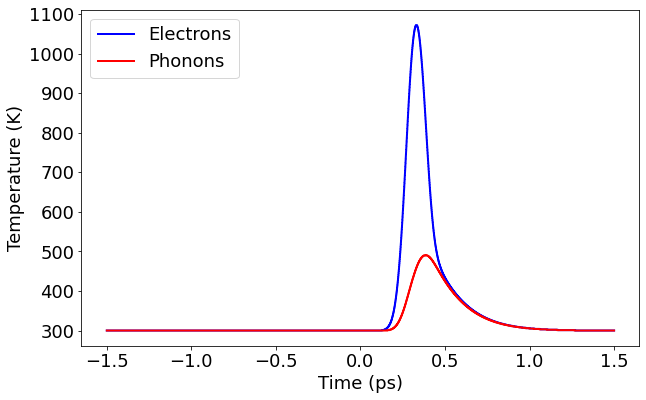

In [8]:
plt.plot(time_array/1e-12, Model_Output['Te'], color="blue", label="Electrons")
plt.plot(time_array/1e-12, Model_Output['Tp'], color="red", label="Phonons")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend(loc=2, prop={'size':18})

In [9]:
maxT=max(Model_Output['T'])
minT=min(Model_Output['T'])

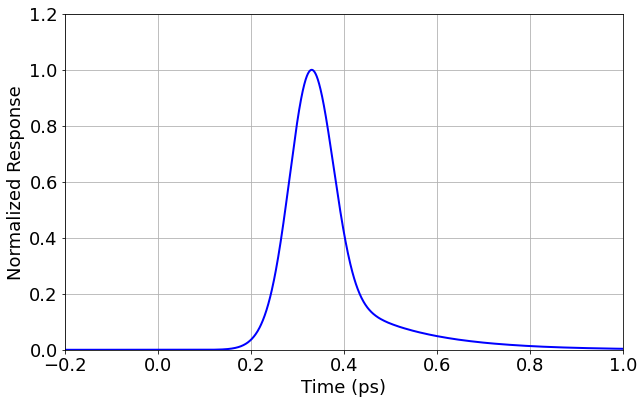

In [10]:
T_array = (Model_Output['T']-minT)/(max(Model_Output['T']-minT))
plt.plot(time_array/1e-12, T_array, color="blue")
plt.xlabel("Time (ps)")
plt.ylabel("Normalized Response")
#plt.title("Transmission vs Time Graph")
plt.grid()
plt.xlim(-0.2, 1)
plt.ylim(0, 1.2)
plt.savefig('Zhang_compare_graph.png',dpi=200)

In [11]:
print(max(Model_Output['T'])-min(Model_Output['T']))

0.008537731086132927
